# **Project Name**    - **Netflix Movies and TV Shows – Exploratory Data Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project performs an in-depth Exploratory Data Analysis and Clustering on the Netflix Movies and TV Shows dataset to uncover patterns in content distribution, growth trends, genre dominance, and regional contributions. The objective is to transform raw content metadata into meaningful business insights that support strategic content planning, audience targeting, and platform growth.

The analysis explores how Netflix’s catalog has evolved over time, whether the platform is shifting toward TV shows, which countries contribute the most content, and which genres dominate the platform. Beyond EDA, unsupervised machine learning techniques are applied to cluster similar content based on textual features such as description, genre, cast, and director. This enables structured content segmentation and enhances recommendation strategies.

The final outcome delivers actionable insights that can guide content investment decisions, improve user engagement, and support long-term growth planning.

# **GitHub Link -**

https://github.com/chandru-md/Netflix_Movies_TVshows_Clustering_Project

# **Problem Statement**


Netflix hosts a large and diverse catalog of movies and TV shows across multiple countries, genres, and audience segments. However, without structured analysis, it is difficult to understand:

- How content distribution has evolved over time

- Whether Netflix is increasingly investing in TV shows

- Which countries and genres dominate the platform

- How content can be segmented for improved recommendations

The challenge is to analyze and structure this data to uncover growth patterns, content clusters, and strategic insights that support business decision-making.

#### **Define Your Business Objective?**

The primary business objective of this project is to generate data-driven insights that help Netflix:

- Understand long-term content growth trends

- Identify dominant genres and ratings categories

- Analyze country-wise content contribution

- Evaluate the strategic shift between Movies and TV Shows

- Segment content into meaningful clusters for improved recommendation systems

- Support content acquisition and regional expansion strategy

The ultimate goal is to align content strategy with audience preferences and maximize platform engagement.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


### Dataset Loading

In [6]:
# Load Dataset
netflix_data = pd.read_csv(r"H:\Netflix_Project\data\raw\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [7]:
# Dataset First Look
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
netflix_data.shape

(7787, 12)

### Dataset Information

In [9]:
# Dataset Info
netflix_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       7787 non-null   str  
 1   type          7787 non-null   str  
 2   title         7787 non-null   str  
 3   director      5398 non-null   str  
 4   cast          7069 non-null   str  
 5   country       7280 non-null   str  
 6   date_added    7777 non-null   str  
 7   release_year  7787 non-null   int64
 8   rating        7780 non-null   str  
 9   duration      7787 non-null   str  
 10  listed_in     7787 non-null   str  
 11  description   7787 non-null   str  
dtypes: int64(1), str(11)
memory usage: 730.2 KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
netflix_data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### What did you know about your dataset?

The dataset contains 7,787 records and 12 features representing Netflix Movies and TV Shows. Each row corresponds to one content title, categorized as either a Movie or a TV Show.

The dataset includes key attributes such as title, type, director, cast, country, release year, rating, duration, genres (listed_in), and description. The description and genre fields are especially important for clustering and content segmentation.

During initial inspection, the following observations were made:

- The dataset contains both Movies and TV Shows.

- There are missing values in columns such as director, cast, country, date_added, and rating.

- No missing values are present in critical fields like title, type, release_year, listed_in, and description.

- The duration column contains mixed formats (minutes for movies and seasons for TV shows), requiring transformation.

- The date_added column is stored as an object and needs conversion to datetime format.

Overall, the dataset is well-structured but requires data cleaning, missing value handling, feature extraction, and transformation before deeper analysis and modeling.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='str')

In [13]:
# Dataset Describe
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. show_id

A unique identifier assigned to each content title.
Used for internal referencing and record tracking.

2. type

Indicates whether the content is a Movie or TV Show.
This variable is critical for analyzing Netflix’s strategic shift between long-format series and standalone films.

3. title

The name of the movie or TV show.
Primarily used for identification and user-facing display.

4. director

Name(s) of the director(s) associated with the content.
Useful for identifying high-performing directors and content partnerships.

5. cast

List of main actors featured in the content.
Helps analyze star power influence and potential audience pull.

6. country

Country or countries where the content was produced.
Essential for understanding regional production trends and international market expansion.

7. date_added

The date when the content was added to Netflix.
Used to analyze content addition trends and growth patterns.

8. release_year

The year the content was originally released.
Helps analyze content freshness and catalog age distribution.

9. rating

Indicates the maturity rating (e.g., TV-MA, PG-13).
Important for audience segmentation and content targeting.

10. duration

Represents:

Minutes for Movies

Number of Seasons for TV Shows

Needs transformation for meaningful duration analysis.

11. listed_in

Represents genre categories assigned to the content.
One of the most important variables for genre trend analysis and clustering.

12. description

A short summary of the content storyline.
This is a key textual feature used for TF-IDF vectorization and clustering to group similar content.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
netflix_data['type'].unique()


<StringArray>
['TV Show', 'Movie']
Length: 2, dtype: str

In [15]:
netflix_data['rating'].unique()


<StringArray>
[   'TV-MA',        'R',    'PG-13',    'TV-14',    'TV-PG',       'NR',
     'TV-G',     'TV-Y',        nan,    'TV-Y7',       'PG',        'G',
    'NC-17', 'TV-Y7-FV',       'UR']
Length: 15, dtype: str

In [16]:
netflix_data['country'].nunique()


681

In [17]:
netflix_data['listed_in'].nunique()

492

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Clean Column Names
netflix_data.columns = netflix_data.columns.str.strip()

In [19]:
# Remove Duplicates
netflix_data = netflix_data.drop_duplicates()

In [20]:
# Handle Missing Values

In [21]:
# Fill categorical columns with 'Unknown'
netflix_data['director'] = netflix_data['director'].fillna('Unknown')
netflix_data['cast'] = netflix_data['cast'].fillna('Unknown')
netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_data['rating'] = netflix_data['rating'].fillna('Unknown')

# Convert date_added to datetime
netflix_data['date_added'] = pd.to_datetime(
    netflix_data['date_added'], errors='coerce')

In [22]:
# Extract year and month added
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# Fill missing year_added using release_year
netflix_data['year_added'] = netflix_data['year_added'].fillna(
    netflix_data['release_year'])

# Fill missing month_added with 1
netflix_data['month_added'] = netflix_data['month_added'].fillna(1)

In [23]:
# Extract numeric duration
netflix_data['duration_int'] = netflix_data['duration'].str.extract('(\d+)')
netflix_data['duration_int'] = netflix_data['duration_int'].astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\CHANDRU DEIVANAYAGAN\AppData\Local\Temp\ipykernel_16220\358035651.py:2: SyntaxWarning: invalid escape sequence '\d'
  netflix_data['duration_int'] = netflix_data['duration'].str.extract('(\d+)')


In [24]:
# Seperate Movies and TV Shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']


In [25]:
# Extract Primary country
netflix_data['primary_country'] = netflix_data['country'].apply(
    lambda x: x.split(',')[0]
)

In [26]:
# Extract primary genre
netflix_data['primary_genre'] = netflix_data['listed_in'].apply(
    lambda x: x.split(',')[0]
)

In [27]:
# Explore genre column
genre_exploded = netflix_data.assign(
    genre=netflix_data['listed_in'].str.split(',')
).explode('genre')

In [28]:
# Final check
netflix_data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added         98
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
duration_int        0
primary_country     0
primary_genre       0
dtype: int64

### What all manipulations have you done and insights you found?

Several preprocessing steps were performed to make the dataset analysis-ready:

- Cleaned column names and removed duplicate records.

- Handled missing values by filling categorical variables such as director, cast, country, and rating with "Unknown".

- Converted the date_added column to datetime format and extracted year_added and month_added for time-based analysis.

- Extracted numeric values from the duration column to create a structured duration_int feature.

- Separated Movies and TV Shows for independent duration analysis.

- Created primary_country and primary_genre variables to simplify regional and genre analysis.

- Exploded the genre column to enable accurate genre frequency analysis.

These transformations improved data consistency and enabled meaningful visualization, trend analysis, and clustering.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Movies vs TV Shows Distribution

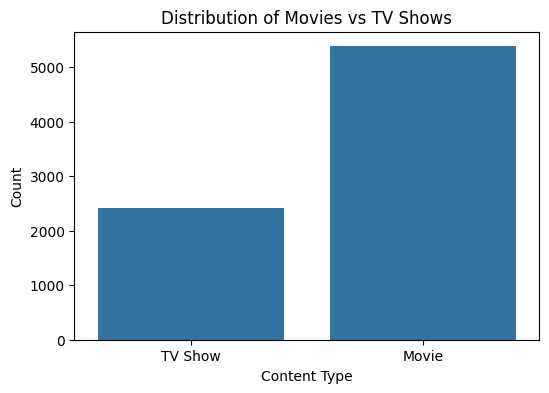

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=netflix_data)
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is appropriate because the objective is to compare the distribution between two categorical variables — Movies and TV Shows. It provides a clear and direct visual comparison of content volume across both categories.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies significantly outnumber TV Shows in the Netflix catalog. This indicates that Netflix historically focused more on movie content compared to episodic series.

However, while movies dominate in total count, this does not necessarily reflect current strategic focus, which will be further examined using year-wise growth analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the distribution helps:

- Identify whether content strategy is balanced.

- Evaluate dependency on movies.

- Support decisions on increasing TV show investments for longer viewer retention.

If the platform relies heavily on movies, there may be opportunities to increase high-engagement TV series to improve user stickiness and subscription retention.

#### Chart - 2 Content Growth Over Years

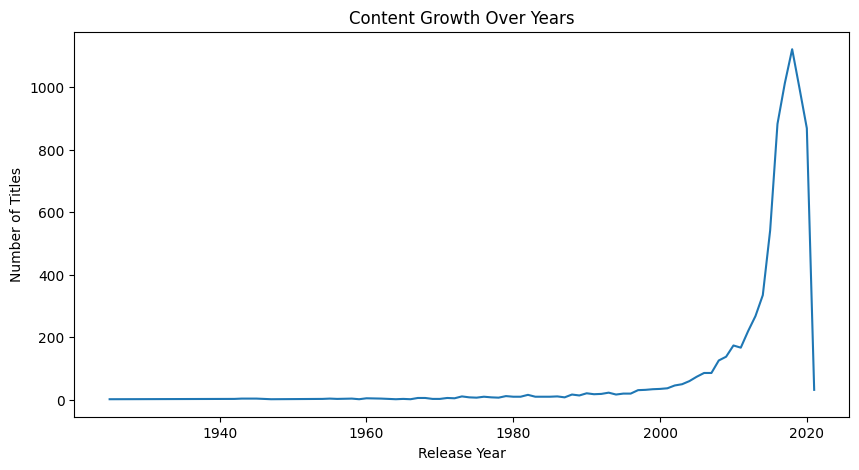

In [30]:
year_count = netflix_data['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(year_count.index, year_count.values)
plt.title("Content Growth Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is suitable for visualizing trends over time. Since release_year is a time-based variable, a line chart clearly shows growth patterns, peaks, and shifts in content production across years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a significant increase in content released after the year 2000, with a sharp rise in the last decade. This indicates:

- Netflix’s catalog is heavily concentrated in modern content.

- There has been rapid growth in content production in recent years.

- The platform prioritizes relatively newer titles over older archival content.

The peak years suggest aggressive content acquisition and production expansion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Understand how content freshness affects engagement.

- Align future investments toward trending production periods.

- Identify whether older content requires strategic refresh or replacement.

If growth slows in recent years, it may signal production constraints or market saturation — which requires strategic adjustment.

#### Chart - 3 Top 10 Countries

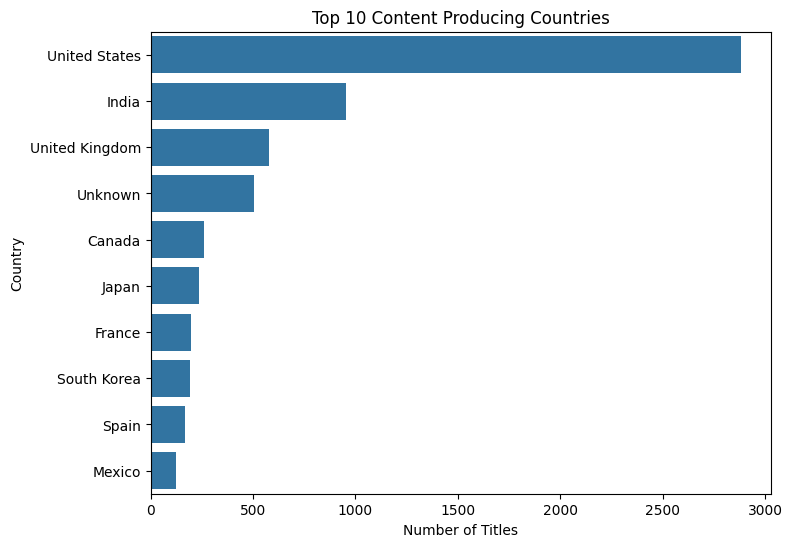

In [31]:
top_countries = netflix_data['primary_country'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking categorical variables with long names like countries. It clearly displays the top contributors and makes comparisons easier to interpret.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the United States dominates Netflix’s content catalog, followed by countries such as India, the United Kingdom, and others.

Key observations:

- The U.S. is the primary content contributor.

- India appears as a major international content producer.

- Content is globally diversified but concentrated among a few countries.

This suggests Netflix has strong presence in specific regional markets while gradually expanding internationally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Identify strong production regions.

- Evaluate market penetration in emerging countries.

- Optimize regional content investment strategies.

If a country shows rapid growth but lower total volume, it may indicate an expansion opportunity.

Over-reliance on one region could also expose the platform to geographic risk, which diversification can mitigate.

#### Chart - 4 Top 10 Genres

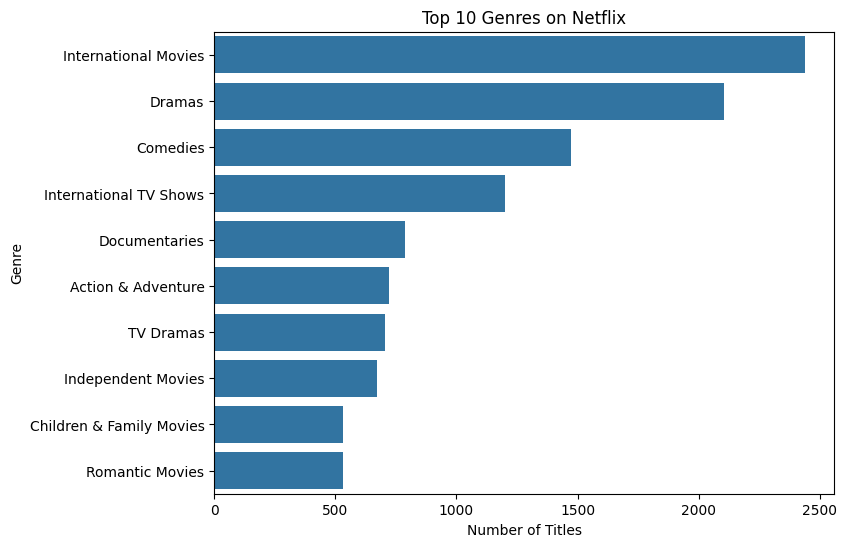

In [32]:
top_genres = (
    netflix_data['listed_in']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for ranking genre categories. Since genres are categorical variables with varying frequencies, this chart clearly highlights dominance and relative popularity among the top 10 genres.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that genres such as Dramas, International Movies, Comedies, and Documentaries dominate the Netflix catalog.

Key observations:

- Drama appears as the most prominent genre.

- International content has a strong presence.

- Comedy remains a consistently popular category.

- Documentary content is also significantly represented.

This suggests Netflix prioritizes emotionally engaging and globally diverse content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Focus investments on high-performing genres.

- Balance genre portfolio to reduce saturation.

- Identify underrepresented genres for diversification.

- Improve recommendation systems through genre segmentation.

If one genre becomes overly dominant, it may reduce content diversity and impact user satisfaction. Balanced genre distribution supports long-term engagement.

#### Chart - 5 Rating Distribution

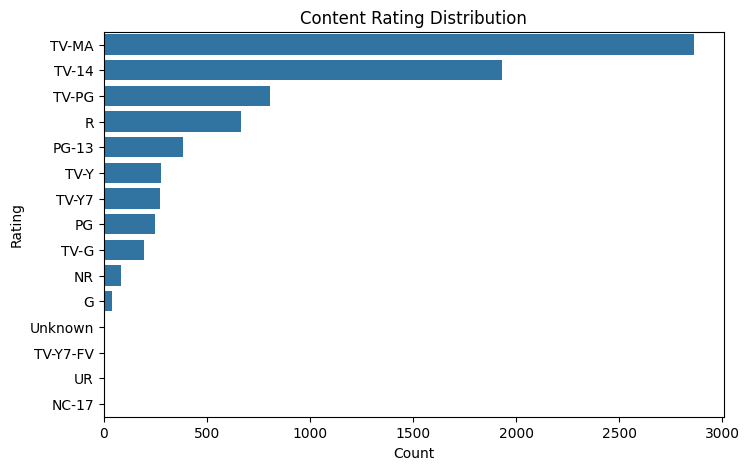

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(
    y='rating',
    data=netflix_data,
    order=netflix_data['rating'].value_counts().index
)
plt.title("Content Rating Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal count plot is ideal for visualizing frequency distribution of categorical variables like content ratings. It clearly shows which audience categories dominate the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that TV-MA and TV-14 ratings dominate the Netflix catalog.

Key insights:

- A large portion of content is targeted toward mature and young adult audiences.

- Limited proportion of strictly kids-only content compared to adult-focused titles.

- Netflix appears to prioritize teen and adult engagement.

This suggests that Netflix’s core audience base is likely young adults and mature viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights allow Netflix to:

- Align content strategy with dominant audience segments.

- Identify potential gaps in children or family-oriented content.

- Balance maturity ratings to broaden subscriber demographics.

If adult-focused content heavily outweighs family content, Netflix may explore expanding into safer, family-friendly segments to increase household subscriptions.

#### Chart - 6 Movie Duration Distribution

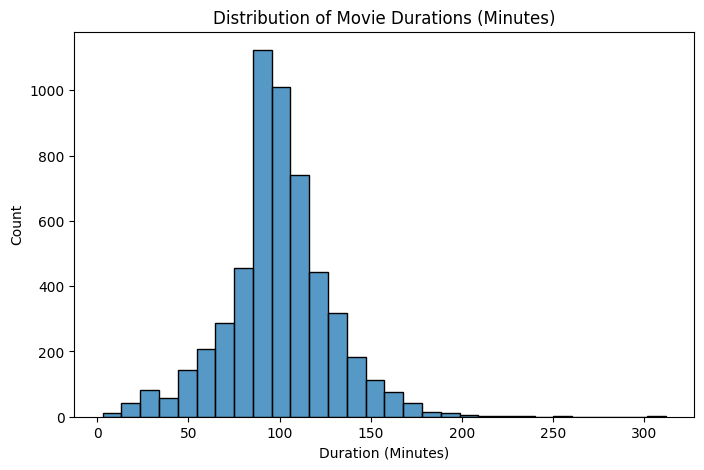

In [34]:
movies = netflix_data[netflix_data['type'] == 'Movie']

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_int'], bins=30)
plt.title("Distribution of Movie Durations (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is appropriate for analyzing the distribution of a continuous variable such as movie duration. It helps identify common runtime ranges and detect skewness or outliers.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows that most movies fall within the 80 to 120-minute range.

Key observations:

- The majority of movies are around 90–110 minutes.

- Very short (<60 minutes) and very long (>150 minutes) movies are rare.

- The distribution appears slightly right-skewed.

This suggests Netflix follows a standard runtime structure aligned with audience viewing comfort and engagement patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding duration patterns helps:

- Optimize content production length.

- Align with viewer attention span.

- Plan marketing around binge-friendly durations.

If most successful movies fall within a specific runtime window, future productions can align with that benchmark to maximize engagement.

#### Chart - 7 TV Shows – Number of Seasons

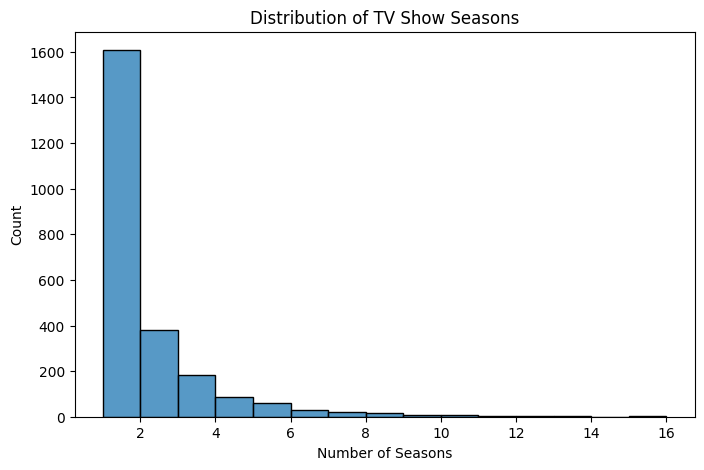

In [35]:
tv = netflix_data[netflix_data['type'] == 'TV Show']

plt.figure(figsize=(8,5))
sns.histplot(tv['duration_int'], bins=15)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for analyzing numeric distributions such as number of seasons. It helps identify whether Netflix focuses on short-format or long-running series.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows that most TV shows have 1 to 2 seasons.

Key observations:

- Majority of TV shows are limited series or short-format content.

- Very few shows extend beyond 5 seasons.

- Long-running series are relatively rare.

This indicates Netflix may prioritize shorter series formats over multi-season long-term productions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Understand binge consumption patterns.

- Optimize production budgets.

- Decide whether to invest in longer franchises.

If shorter series dominate, Netflix may be focusing on content variety rather than long-term episodic commitments. However, investing in high-performing multi-season series could increase subscriber retention.

#### Chart - 8 Year Added vs Content Type

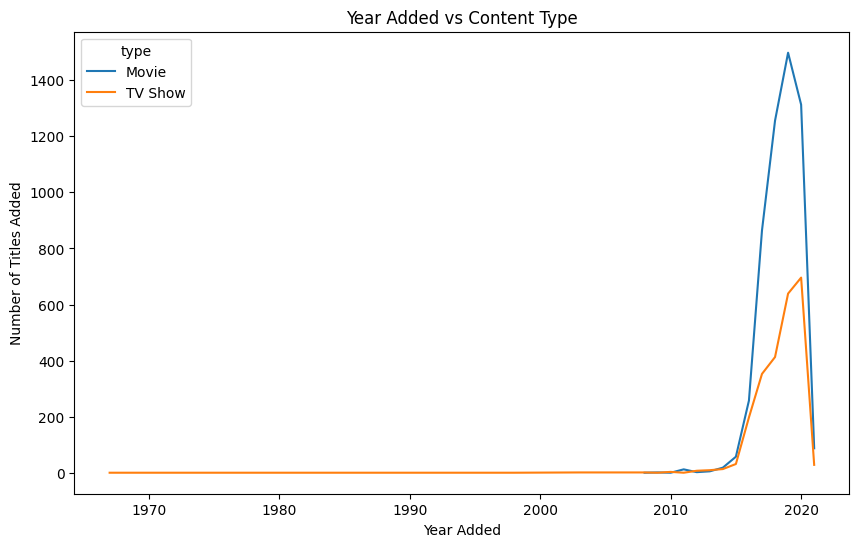

In [36]:
content_by_year_type = (
    netflix_data
    .groupby(['year_added','type'])
    .size()
    .unstack()
)

content_by_year_type.plot(figsize=(10,6))
plt.title("Year Added vs Content Type")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.show()

##### 1. Why did you pick the specific chart?

A multi-line plot is appropriate because we are comparing two categories (Movies and TV Shows) across time. This allows clear visualization of growth trends and strategic shifts over years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a steady increase in both Movies and TV Shows over time, with a sharp rise after 2015.

Key observations:

- Movie additions consistently remain higher overall.

- TV Show additions increase significantly in recent years.

- The gap between Movies and TV Shows narrows over time.

This suggests Netflix is gradually increasing its investment in episodic content, possibly to improve long-term viewer retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight directly supports strategic planning:

- If TV Shows are increasing, Netflix is likely focusing on binge-driven engagement.

- Series-based content improves subscriber retention compared to one-time movie viewing.

- Understanding this shift helps allocate production budgets more effectively.

If the trend continues, Netflix may strengthen its position as a dominant streaming platform built around serialized storytelling.

#### Chart - 9 Country vs Type (Top 5 Countries)

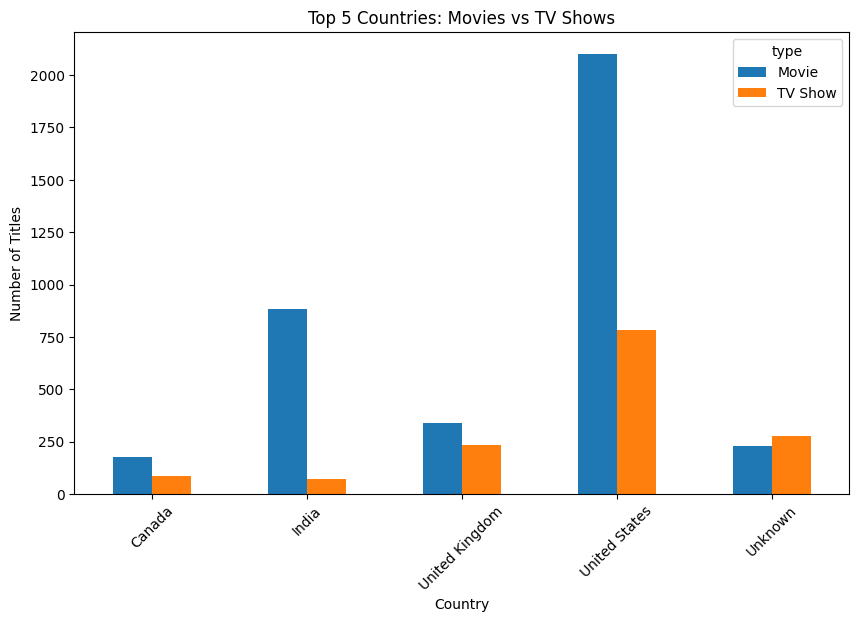

In [37]:
top5 = netflix_data['primary_country'].value_counts().head(5).index

subset = netflix_data[netflix_data['primary_country'].isin(top5)]

country_type = (
    subset
    .groupby(['primary_country','type'])
    .size()
    .unstack()
)

country_type.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 Countries: Movies vs TV Shows")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is ideal for comparing two categories (Movies and TV Shows) across multiple countries. It clearly highlights format preference by region.

##### 2. What is/are the insight(s) found from the chart?

The chart shows noticeable variation in content type distribution across countries.

Key observations:

- The United States produces a high volume of both Movies and TV Shows.

- Some countries lean more toward movie production.

- Others show a relatively stronger presence in TV content.

This indicates that content format preference may vary by region, influenced by local production ecosystems and audience demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights allow Netflix to:

- Customize content strategy by region.

- Increase TV investments in countries where series perform well.

- Expand movie production in markets where films dominate.

Understanding regional format preferences improves localization strategy and market penetration efficiency.

#### Chart - 10 Release Year Distribution

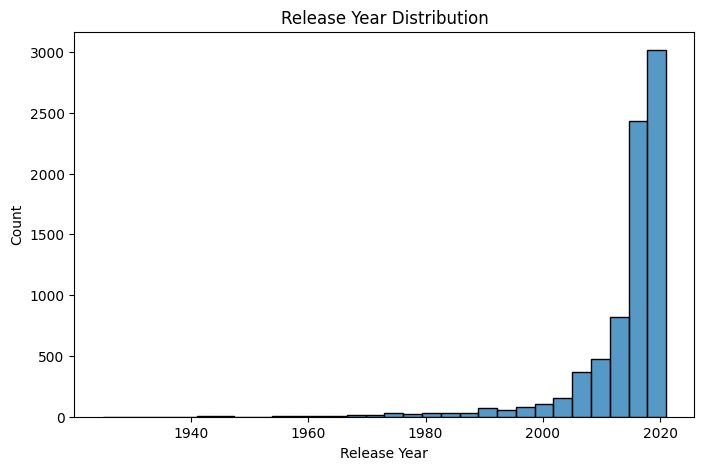

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(netflix_data['release_year'], bins=30)
plt.title("Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is appropriate for analyzing the distribution of a continuous time variable such as release_year. It helps visualize the concentration of content across different production periods.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows a strong concentration of content released after the year 2000, with a noticeable surge in recent years.

Key observations:

- Majority of titles are modern releases.

- Very limited representation of classic or older archival content.

- Significant rise in production after 2010.

This indicates that Netflix prioritizes relatively recent content over older titles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Maintain a fresh and competitive catalog.

- Understand lifecycle trends of content.

- Identify whether adding classic content could attract niche audiences.

If the catalog becomes overly concentrated in recent years, diversification with timeless classics may improve long-term value.

#### Chart - 11 Monthly Content Addition

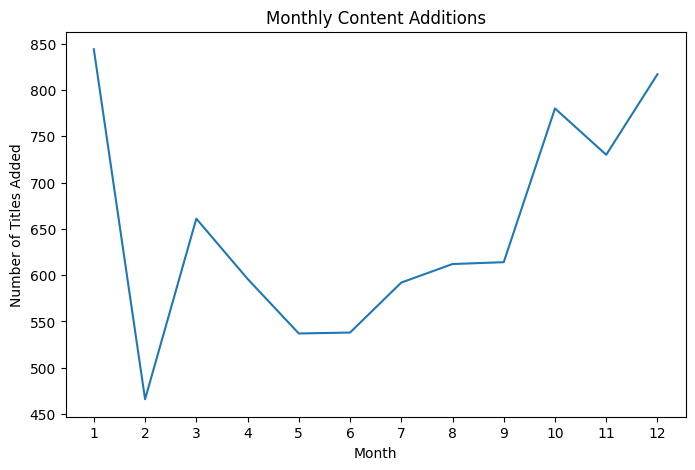

In [39]:
monthly_content = (
    netflix_data['month_added']
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(8,5))
plt.plot(monthly_content.index, monthly_content.values)
plt.title("Monthly Content Additions")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(range(1,13))
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is appropriate because we are analyzing trends across ordered time units (months). It clearly shows seasonal fluctuations in content addition patterns.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals variation in content additions across different months.

Key observations:

- Certain months show noticeably higher additions.

- Some months have relatively lower activity.

- There appears to be periodic spikes, possibly aligned with seasonal demand or strategic release windows.

This suggests Netflix may time content releases strategically based on audience behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights allow Netflix to:

- Optimize release timing.

- Align major content launches with peak engagement periods.

- Plan marketing campaigns around high-addition months.

If specific months consistently underperform, Netflix can adjust release strategies to smooth engagement throughout the year.

#### Chart - 12 Top 10 Directors

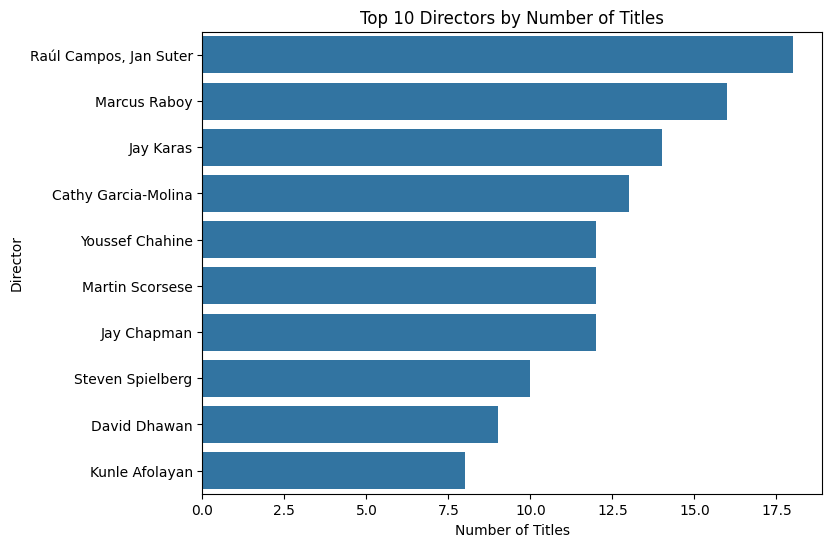

In [40]:
top_directors = (
    netflix_data[netflix_data['director'] != 'Unknown']['director']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is appropriate for ranking directors based on frequency. It clearly displays the top contributors and allows easy comparison of content volume across individuals.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights a small group of directors contributing multiple titles to Netflix.

Key observations:

- A few directors appear repeatedly in the catalog.

- Most directors contribute only one or two titles.

- The content ecosystem appears highly distributed rather than concentrated among a few creators.

This suggests Netflix collaborates with a wide range of filmmakers rather than relying heavily on a limited group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Netflix:

- Identify high-performing director partnerships.

- Strengthen collaborations with repeat contributors.

- Diversify creative partnerships to reduce dependency risk.

If certain directors consistently produce successful content, Netflix can invest in long-term contracts or exclusive deals.

## ***6. Feature Engineering & Data Pre-processing***

- We combine fields that define content similarity.

### Combine Important Text Columns

In [41]:
# Combine relevant text columns
netflix_data['combined_text'] = (
    netflix_data['description'].fillna('') + ' ' +
    netflix_data['listed_in'].fillna('') + ' ' +
    netflix_data['cast'].fillna('') + ' ' +
    netflix_data['director'].fillna('')
)

netflix_data[['combined_text']].head()

,combined_text
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...


#### Text Cleaning

- We clean text to remove noise before vectorization.

In [43]:
# Download required resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)          # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)         # Remove punctuation & digits
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

netflix_data['clean_text'] = netflix_data['combined_text'].apply(clean_text)

netflix_data[['clean_text']].head()

[nltk_data] Downloading package stopwords to C:\Users\CHANDRU
[nltk_data]     DEIVANAYAGAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\CHANDRU
[nltk_data]     DEIVANAYAGAN\AppData\Roaming\nltk_data...


,clean_text
0,future elite inhabit island paradise far crowd...
1,devastating earthquake hit mexico city trapped...
2,army recruit found dead fellow soldier forced ...
3,postapocalyptic world ragdoll robot hide fear ...
4,brilliant group student become cardcounting ex...


In [ ]:
#### TF-IDF Vectorization

- We convert cleaned text into numerical form.

In [44]:
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X = tfidf.fit_transform(netflix_data['clean_text'])

X.shape

(7787, 5000)

## **7. Clustering Modeling**

#### Determine Optimal Number of Clusters (Elbow Method)

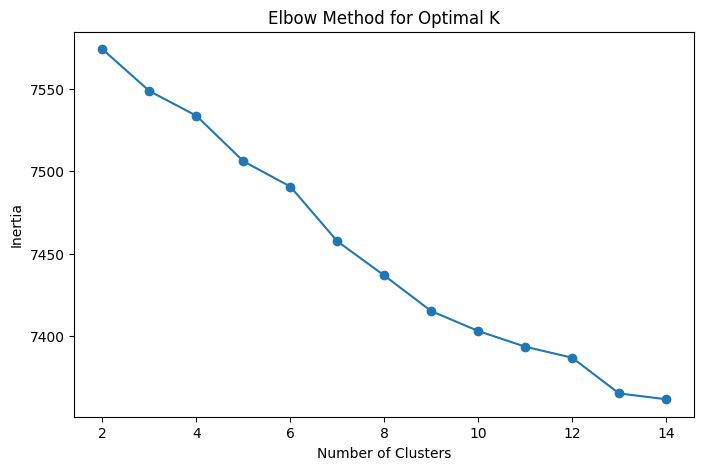

In [45]:
inertia = []

K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

#### Silhouette Score Validation

In [46]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K = {k}, Silhouette Score = {score:.4f}")

K = 2, Silhouette Score = 0.0081
K = 3, Silhouette Score = 0.0085
K = 4, Silhouette Score = 0.0084
K = 5, Silhouette Score = 0.0098
K = 6, Silhouette Score = 0.0103
K = 7, Silhouette Score = 0.0116
K = 8, Silhouette Score = 0.0073
K = 9, Silhouette Score = 0.0083


#### Apply KMeans with Optimal K

In [47]:
optimal_k = 8  # Adjust based on your result

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
netflix_data['cluster_kmeans'] = kmeans.fit_predict(X)

netflix_data['cluster_kmeans'].value_counts()

cluster_kmeans
4    1794
0    1737
1    1347
6    1346
2     688
7     378
5     327
3     170
Name: count, dtype: int64

#### Hierarchical Clustering

In [48]:
# Use smaller sample if needed
X_dense = X[:2000].toarray()

agg = AgglomerativeClustering(n_clusters=optimal_k)
labels_agg = agg.fit_predict(X_dense)

print("Hierarchical clustering completed.")

Hierarchical clustering completed.


## **8. Cluster Interpretation & Business Strategy**

In [ ]:
Understand Cluster Distribution

In [49]:
netflix_data['cluster_kmeans'].value_counts()
# This shows how content is distributed across clusters.

cluster_kmeans
4    1794
0    1737
1    1347
6    1346
2     688
7     378
5     327
3     170
Name: count, dtype: int64

In [ ]:
Interpret Clusters by Genre

In [50]:
def interpret_clusters(data, cluster_col):
    for cluster_id in sorted(data[cluster_col].unique()):
        print(f"\nCluster {cluster_id}")
        print(
            data[data[cluster_col] == cluster_id]['primary_genre']
            .value_counts()
            .head(5)
        )

interpret_clusters(netflix_data, 'cluster_kmeans')


Cluster 0
primary_genre
Dramas                  784
Comedies                607
Action & Adventure      148
Horror Movies            81
International Movies     60
Name: count, dtype: int64

Cluster 1
primary_genre
Dramas            512
Comedies          388
Horror Movies     161
Thrillers          49
Classic Movies     37
Name: count, dtype: int64

Cluster 2
primary_genre
Documentaries               630
Docuseries                   17
Children & Family Movies     12
Classic Movies               12
Action & Adventure            4
Name: count, dtype: int64

Cluster 3
primary_genre
International TV Shows    114
Crime TV Shows             22
Kids' TV                   11
Dramas                      9
Action & Adventure          9
Name: count, dtype: int64

Cluster 4
primary_genre
International TV Shows    562
Crime TV Shows            339
British TV Shows          225
Kids' TV                  205
Docuseries                132
Name: count, dtype: int64

Cluster 5
primary_genre
Documentar

In [ ]:
Interpret by Country

In [51]:
for cluster_id in sorted(netflix_data['cluster_kmeans'].unique()):
    print(f"\nCluster {cluster_id} - Top Countries")
    print(
        netflix_data[netflix_data['cluster_kmeans'] == cluster_id]
        ['primary_country']
        .value_counts()
        .head(3)
    )


Cluster 0 - Top Countries
primary_country
India    744
Egypt     89
Spain     78
Name: count, dtype: int64

Cluster 1 - Top Countries
primary_country
United States     946
United Kingdom    141
Canada             82
Name: count, dtype: int64

Cluster 2 - Top Countries
primary_country
United States     368
United Kingdom     84
Unknown            35
Name: count, dtype: int64

Cluster 3 - Top Countries
primary_country
South Korea      154
Unknown           13
United States      2
Name: count, dtype: int64

Cluster 4 - Top Countries
primary_country
United States     522
United Kingdom    224
Unknown           223
Name: count, dtype: int64

Cluster 5 - Top Countries
primary_country
United States     107
India              95
United Kingdom     24
Name: count, dtype: int64

Cluster 6 - Top Countries
primary_country
United States    668
Japan            143
Unknown           96
Name: count, dtype: int64

Cluster 7 - Top Countries
primary_country
United States    247
Unknown           35
Mex

In [ ]:
Extract Top Keywords per Cluster

In [52]:
terms = tfidf.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(optimal_k):
    print(f"\nCluster {i} Top Keywords:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(top_terms)


Cluster 0 Top Keywords:
['movie', 'international', 'drama', 'comedy', 'romantic', 'independent', 'man', 'young', 'khan', 'woman']

Cluster 1 Top Keywords:
['movie', 'drama', 'thriller', 'independent', 'michael', 'john', 'comedy', 'horror', 'david', 'james']

Cluster 2 Top Keywords:
['documentary', 'unknown', 'movie', 'sport', 'international', 'life', 'world', 'history', 'explores', 'film']

Cluster 3 Top Keywords:
['kim', 'tv', 'lee', 'korean', 'park', 'jung', 'unknown', 'international', 'romantic', 'kang']

Cluster 4 Top Keywords:
['tv', 'unknown', 'international', 'crime', 'docuseries', 'drama', 'reality', 'kid', 'series', 'british']

Cluster 5 Top Keywords:
['music', 'musical', 'documentary', 'movie', 'international', 'band', 'comedy', 'khan', 'kapoor', 'drama']

Cluster 6 Top Keywords:
['adventure', 'action', 'family', 'child', 'movie', 'unknown', 'comedy', 'kid', 'michael', 'david']

Cluster 7 Top Keywords:
['standup', 'comedy', 'comedian', 'special', 'comic', 'talk', 'stage', 'j

### Cluster Insights & Business Strategy

The clustering model grouped Netflix content into distinct thematic segments based on textual similarity.

Key cluster themes identified include:

- Crime & Thriller content

- International dramas

- Kids & family entertainment

- Action & adventure films

- Documentary-based content

- Romantic movies

- TV drama series

- Comedy-focused titles

#### Strategic Implications:

Content Recommendation - 
    Clusters can directly power recommendation systems by suggesting similar titles within the same cluster.

Targeted Marketing - 
    Marketing campaigns can target cluster-specific audiences (e.g., crime lovers, family viewers).

Investment Strategy - 
    If a cluster shows strong representation and high engagement, Netflix can increase investment in that genre.

Regional Strategy - 
    Country-dominant clusters help identify where localized content performs well.

Portfolio Diversification - 
    Underrepresented clusters may signal opportunities for content expansion.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the exploratory analysis and clustering results, the following strategic recommendations are suggested:

1. Increase Investment in High-Growth TV Content

The analysis shows a steady increase in TV show additions over recent years. Since TV shows encourage longer engagement and binge-watching behavior, increasing investment in high-performing series can improve subscriber retention.

2. Strengthen Regional Content Strategy

The United States dominates the catalog, but countries like India and the United Kingdom show strong contributions. Expanding localized content in high-growth regions can increase international subscriber growth and reduce geographic concentration risk.

3. Focus on Dominant Genres

Genres such as Drama, International Movies, and Comedy appear highly represented. Netflix should continue investing in these categories while also identifying underrepresented but emerging genres to maintain content diversity.

4. Leverage Cluster-Based Recommendation Systems

The clustering model segmented content into meaningful groups such as crime, romance, documentaries, kids content, and action. These clusters can enhance recommendation engines, enabling more personalized content suggestions and improved user satisfaction.

5. Optimize Release Timing

Monthly content addition trends suggest strategic release timing. Netflix can align major releases with high-engagement months to maximize viewership impact and marketing efficiency.

Overall, combining EDA insights with clustering-driven segmentation allows Netflix to make data-driven decisions in content acquisition, production planning, and personalized recommendations.

# **Conclusion**

This project performed a comprehensive Exploratory Data Analysis and Clustering on the Netflix Movies and TV Shows dataset to uncover meaningful business insights.

The analysis revealed that Movies currently dominate the catalog, though TV shows have grown significantly in recent years. Content production is heavily concentrated in a few key countries, particularly the United States, while international expansion continues to strengthen. Genres such as Drama, Comedy, and International content form the core of the platform’s portfolio.

Duration analysis showed that most movies follow a standard 90–110 minute format, while TV shows are typically limited to one or two seasons. Rating distribution indicates that the platform primarily targets young adult and mature audiences.

Through TF-IDF vectorization and clustering algorithms, content was segmented into distinct thematic groups. These clusters provide a structured foundation for improving recommendation systems, optimizing content investment strategies, and enhancing regional targeting.

Overall, the project demonstrates how structured data analysis combined with machine learning techniques can transform raw metadata into actionable business intelligence that supports strategic growth and competitive advantage.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***